In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_csv('../data/train.csv')

In [21]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Exploration + Feature Engineering

In [5]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

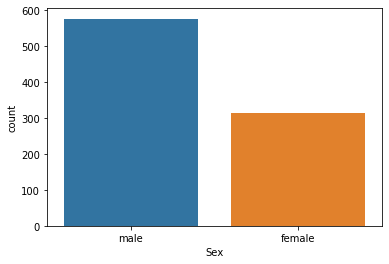

In [6]:
sns.countplot(x="Sex", data=data)

In [7]:
data["Age"].fillna(value=data["Age"].mean(), inplace=True)

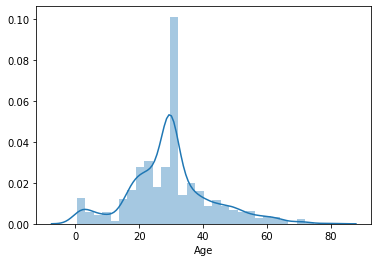

In [8]:
sns.distplot(data["Age"])

In [21]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

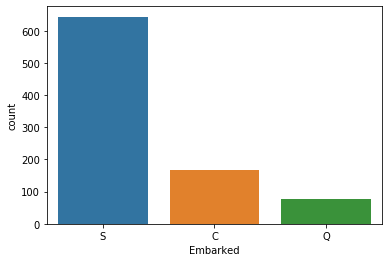

In [10]:
sns.countplot(data["Embarked"])

In [30]:
data["sex_encoded"] = data.apply(lambda r: 0 if r["Sex"] == 'male' else 1, axis=1)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
data["Embarked"].fillna(value='S', inplace=True)

In [35]:
data["embarked_encoded"] = data.apply(lambda r: 'SCQ'.index(r["Embarked"]), axis=1)

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_letter,cabin_number,title_encoded,sex_encoded,embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,13,0,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,85,3,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13,0,3,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,123,3,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13,0,2,0,0


In [37]:
def encode_cabin(row):
    if row["Cabin"] == None:
        return 0
    else:
        return 'abcdefghijklmnopqrstuvwxyz'.index(str(row["Cabin"])[0].lower())

data["cabin_letter"] = data.apply(encode_cabin, axis=1)

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_letter,cabin_number,title_encoded,sex_encoded,embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,13,0,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,85,3,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13,0,3,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,123,3,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13,0,2,0,0


In [39]:
def extract_cabin_number(row):
    num = ''
    
    for i in str(row["Cabin"]):
        if i.isnumeric():
            num += i
            
    if num == '':
        return 0
            
    return int(num)
    
data["cabin_number"] = data.apply(extract_cabin_number, axis=1)

In [40]:
data.Name[100:200].values

array(['Petranec, Miss. Matilda', 'Petroff, Mr. Pastcho ("Pentcho")',
       'White, Mr. Richard Frasar', 'Johansson, Mr. Gustaf Joel',
       'Gustafsson, Mr. Anders Vilhelm', 'Mionoff, Mr. Stoytcho',
       'Salkjelsvik, Miss. Anna Kristine', 'Moss, Mr. Albert Johan',
       'Rekic, Mr. Tido', 'Moran, Miss. Bertha',
       'Porter, Mr. Walter Chamberlain', 'Zabour, Miss. Hileni',
       'Barton, Mr. David John', 'Jussila, Miss. Katriina',
       'Attalah, Miss. Malake', 'Pekoniemi, Mr. Edvard',
       'Connors, Mr. Patrick', 'Turpin, Mr. William John Robert',
       'Baxter, Mr. Quigg Edmond', 'Andersson, Miss. Ellis Anna Maria',
       'Hickman, Mr. Stanley George', 'Moore, Mr. Leonard Charles',
       'Nasser, Mr. Nicholas', 'Webber, Miss. Susan',
       'White, Mr. Percival Wayland', 'Nicola-Yarred, Master. Elias',
       'McMahon, Mr. Martin', 'Madsen, Mr. Fridtjof Arne',
       'Peter, Miss. Anna', 'Ekstrom, Mr. Johan', 'Drazenoic, Mr. Jozef',
       'Coelho, Mr. Domingos Fernan

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_letter,cabin_number,title_encoded,sex_encoded,embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,13,0,2,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,85,3,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13,0,3,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,123,3,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13,0,2,0,0


In [42]:
def encode_title(row):
    if "master" in row["Name"].lower():
        return 1
    elif "mr." in row["Name"].lower():
        return 2
    elif "mrs." in row["Name"].lower():
        return 3
    elif "miss." in row["Name"].lower():
        return 3
    else:
        return 0

data["title_encoded"] = data.apply(encode_title, axis=1)

# Recursive Feature Selection

In [43]:
features = data[["Pclass", "SibSp", "Parch", "Fare", "sex_encoded", "embarked_encoded", "cabin_letter", "cabin_number", "title_encoded"]]
y = data["Survived"]

In [44]:
features.head()

,Pclass,SibSp,Parch,Fare,sex_encoded,embarked_encoded,cabin_letter,cabin_number,title_encoded
0,3,1,0,7.2500,0,0,13,0,2
1,1,1,0,71.2833,1,1,2,85,3
2,3,0,0,7.9250,1,0,13,0,3
3,1,1,0,53.1000,1,0,2,123,3
4,3,0,0,8.0500,0,0,13,0,2


In [45]:
features.dtypes

Pclass                int64
SibSp                 int64
Parch                 int64
Fare                float64
sex_encoded           int64
embarked_encoded      int64
cabin_letter          int64
cabin_number          int64
title_encoded         int64
dtype: object

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV # Recursive Feature Elimination Cross Validation
from sklearn.model_selection import StratifiedKFold

In [47]:
random_seed_state = 31

my_rfc = RandomForestClassifier(n_estimators=5, n_jobs=-1, random_state=random_seed_state)

In [48]:
my_rfc_selector = RFECV(my_rfc, step=1, cv=StratifiedKFold(10), verbose=2, n_jobs=-1, scoring='f1_macro')

In [49]:
selector = my_rfc_selector.fit(features, y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.


In [51]:
selector.ranking_

array([1, 2, 3, 1, 1, 4, 1, 1, 1])

In [52]:
# Go through this in my own time:

my_rfc_selector.ranking_
feat_ranks = pd.DataFrame(data = {'features': features.columns.values, 'rfe ranking': my_rfc_selector.ranking_} )
feat_ranks.sort_values(by = 'rfe ranking', inplace=True)

best_number_feats_rfe = my_rfc_selector.n_features_

In [53]:
#best_number_feats_rfe = 15

In [54]:
best_feats = list(feat_ranks['features'][0: best_number_feats_rfe])

In [56]:
best_feats

['Pclass',
 'Fare',
 'sex_encoded',
 'cabin_letter',
 'cabin_number',
 'title_encoded']

In [57]:
RFCV_df = pd.DataFrame(data = {'Number of Features' : range(1, len(my_rfc_selector.grid_scores_) + 1), 'F1 Score': my_rfc_selector.grid_scores_})

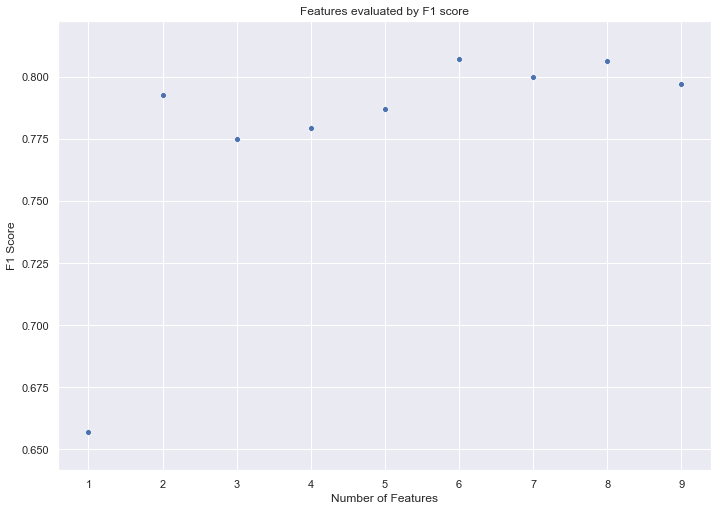

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.scatterplot(data = RFCV_df, x = 'Number of Features', y = 'F1 Score').set_title('Features evaluated by F1 score')

In [59]:
best_feats

['Pclass',
 'Fare',
 'sex_encoded',
 'cabin_letter',
 'cabin_number',
 'title_encoded']

In [60]:
# Cross validation is checking different cuts of the data for validation
# - 10 fold is standard (10 different sets of your data)

In [61]:
train_x = data[best_feats]

In [62]:
train_x.head()

,Pclass,Fare,sex_encoded,cabin_letter,cabin_number,title_encoded
0,3,7.2500,0,13,0,2
1,1,71.2833,1,2,85,3
2,3,7.9250,1,13,0,3
3,1,53.1000,1,2,123,3
4,3,8.0500,0,13,0,2


In [63]:
%store train_x

Stored 'train_x' (DataFrame)


In [64]:
%store y

Stored 'y' (Series)
